In [126]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end


naive_multiplication (generic function with 1 method)

In [127]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(A,1)
    for k=1:size(B,2)
        for i=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [128]:
Asmall=[[1.0 0.0]; [0.0 1.0]]
Bsmall=Asmall

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [129]:
naive_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [130]:
better_multiplication(Asmall, Bsmall)

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [131]:
results_naive=[]
results_better=[]
results_blas=[]
for i=1:50
    for j=1:10
        B = rand(i*10, i*10)
        C = rand(i*10, i*10)
        push!(results_naive, @elapsed naive_multiplication(B,C))
        push!(results_better, @elapsed better_multiplication(B,C))
        push!(results_blas, @elapsed B*C)
    end
end

In [132]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("Statistics")
Pkg.add("Polynomials")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [133]:
using DataFrames
using Plots
using Statistics
using CSV
using Polynomials

In [134]:
df = DataFrame()
df[:naive] = results_naive
df[:better] = results_better
df[:blas] = results_blas
df[:sizes] = [i for i=1:50 for j=1:10]
show(df)

500×4 DataFrame
│ Row │ naive    │ better   │ blas       │ sizes │
│     │ Any      │ Any      │ Any        │ Int64 │
├─────┼──────────┼──────────┼────────────┼───────┤
│ 1   │ 3.6e-6   │ 2.243e-6 │ 6.306e-6   │ 1     │
│ 2   │ 2.666e-6 │ 2.337e-6 │ 6.12e-7    │ 1     │
│ 3   │ 2.584e-6 │ 1.942e-6 │ 5.68e-7    │ 1     │
│ 4   │ 2.561e-6 │ 1.968e-6 │ 8.38e-7    │ 1     │
│ 5   │ 2.339e-6 │ 1.914e-6 │ 5.96e-7    │ 1     │
│ 6   │ 2.537e-6 │ 1.902e-6 │ 5.86e-7    │ 1     │
│ 7   │ 2.357e-6 │ 1.996e-6 │ 5.59e-7    │ 1     │
⋮
│ 493 │ 0.47395  │ 0.193216 │ 0.00590314 │ 50    │
│ 494 │ 0.456004 │ 0.198837 │ 0.00599693 │ 50    │
│ 495 │ 0.454441 │ 0.190777 │ 0.00659762 │ 50    │
│ 496 │ 0.462669 │ 0.191795 │ 0.00592241 │ 50    │
│ 497 │ 0.466736 │ 0.193358 │ 0.00609557 │ 50    │
│ 498 │ 0.460256 │ 0.213891 │ 0.00589499 │ 50    │
│ 499 │ 0.467888 │ 0.198984 │ 0.00583323 │ 50    │
│ 500 │ 0.453703 │ 0.201733 │ 0.00868898 │ 50    │

In [135]:
vcat(by(df, :sizes, x -> mean(x.naive))[:x1], by(df, :sizes, x -> mean(x.better))[:x1], by(df, :sizes, x -> mean(x.blas))[:x1])

150-element Array{Float64,1}:
 2.5897e-6             
 1.9952200000000002e-5 
 7.196319999999999e-5  
 0.00018823210000000002
 0.000436851           
 0.0007148097999999999 
 0.0013446471999999999 
 0.0032201860000000007 
 0.002908514           
 0.004091658599999999  
 0.0055037809          
 0.007349037800000001  
 0.009308958599999998  
 ⋮                     
 0.0033577152          
 0.0034746261000000002 
 0.0034000573          
 0.0038667292          
 0.0040835125          
 0.004241780400000001  
 0.004127722           
 0.0060264509          
 0.005006026699999999  
 0.0051722496          
 0.006042973800000001  
 0.006316007199999999  

In [136]:
newdf = DataFrame()
newdf[:size] = [j*10 for i=1:3 for j=1:50]
newdf[:means] = vcat(by(df, :sizes, x -> mean(x.naive))[:x1], by(df, :sizes, x -> mean(x.better))[:x1], by(df, :sizes, x -> mean(x.blas))[:x1])
newdf[:stds] = vcat(by(df, :sizes, x -> std(x.naive))[:x1], by(df, :sizes, x -> std(x.better))[:x1], by(df, :sizes, x -> std(x.blas))[:x1])
newdf[:types] = [i for i=1:3 for j=1:50]
show(newdf)

150×4 DataFrame
│ Row │ size  │ means       │ stds        │ types │
│     │ Int64 │ Float64     │ Float64     │ Int64 │
├─────┼───────┼─────────────┼─────────────┼───────┤
│ 1   │ 10    │ 2.5897e-6   │ 3.71859e-7  │ 1     │
│ 2   │ 20    │ 1.99522e-5  │ 2.22822e-7  │ 1     │
│ 3   │ 30    │ 7.19632e-5  │ 1.20227e-6  │ 1     │
│ 4   │ 40    │ 0.000188232 │ 6.81553e-6  │ 1     │
│ 5   │ 50    │ 0.000436851 │ 4.967e-5    │ 1     │
│ 6   │ 60    │ 0.00071481  │ 1.10168e-5  │ 1     │
│ 7   │ 70    │ 0.00134465  │ 9.89014e-5  │ 1     │
⋮
│ 143 │ 430   │ 0.00408351  │ 0.000740984 │ 3     │
│ 144 │ 440   │ 0.00424178  │ 0.000186038 │ 3     │
│ 145 │ 450   │ 0.00412772  │ 3.24727e-5  │ 3     │
│ 146 │ 460   │ 0.00602645  │ 0.00345812  │ 3     │
│ 147 │ 470   │ 0.00500603  │ 0.000278122 │ 3     │
│ 148 │ 480   │ 0.00517225  │ 0.000854683 │ 3     │
│ 149 │ 490   │ 0.00604297  │ 0.00115584  │ 3     │
│ 150 │ 500   │ 0.00631601  │ 0.000868873 │ 3     │

┌ Warning: Skipped marker arg *.
└ @ Plots /home/wojlewy/.julia/packages/Plots/Ufx0i/src/args.jl:744


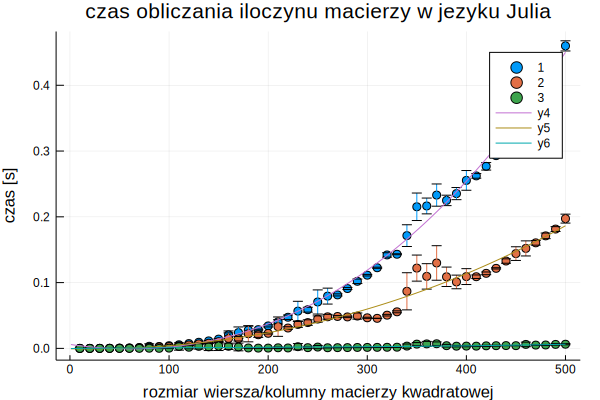

In [168]:
wykres_julia = scatter(newdf[:size], newdf[:means], group=newdf[:types], yerr=newdf[:stds],  xlabel = "rozmiar wiersza/kolumny macierzy kwadratowej", ylabel = "czas [s]", title = "czas obliczania iloczynu macierzy w jezyku Julia")
sizesnaive = newdf[:size][1:50]
sizesbetter = newdf[:size][51:100]
sizesblas = newdf[:size][101:150]
meansnaive = newdf[:means][1:50]
meansbetter = newdf[:means][51:100]
meansblas = newdf[:means][101:150]
fit1 = polyfit(sizesnaive, meansnaive, 3)
fit2 = polyfit(sizesbetter, meansbetter, 3)
fit3 = polyfit(sizesblas, meansblas, 3)
plot!(1:1:500,polyval(fit1,1:1:500))
plot!(1:1:500,polyval(fit2,1:1:500))
plot!(1:1:500,polyval(fit3,1:1:500))

In [138]:
input ="/home/wojlewy/Pulpit/LewickiWojciech/mownit2/lab3/resadded1.csv"
results =CSV.read(input, delim=";")

,naive100,naive200,naive300,naive400,naive500,better100,better200,better300,better400,better500,blas100,blas200,blas300,blas400,blas500,tryb
,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,0.01028,0.045578,0.174791,0.392963,0.918212,0.0047,0.037142,0.126109,0.297775,0.594719,0.000748,0.006323,0.021328,0.052312,0.103543,1
2,0.004996,0.043024,0.157769,0.388781,0.918123,0.005054,0.038892,0.124603,0.296872,0.585831,0.000732,0.006251,0.021567,0.050773,0.101344,1
3,0.004912,0.044454,0.157418,0.390834,0.900695,0.005218,0.039159,0.126036,0.298894,0.587875,0.000734,0.006516,0.021537,0.051694,0.107156,1
4,0.004682,0.042925,0.156485,0.395152,0.918871,0.004678,0.03691,0.124313,0.298489,0.580344,0.000739,0.006511,0.021599,0.051056,0.104433,1
5,0.00473,0.041787,0.161371,0.401884,0.911875,0.004689,0.037506,0.12647,0.295967,0.584149,0.000777,0.006302,0.021468,0.051367,0.105425,1
6,0.004694,0.042055,0.15791,0.385532,0.914145,0.004756,0.037554,0.126755,0.298315,0.582774,0.00074,0.006434,0.02129,0.052047,0.104353,1
7,0.004774,0.042696,0.163576,0.37192,0.865621,0.00478,0.037548,0.127736,0.296838,0.580937,0.000742,0.006298,0.022238,0.051516,0.105558,1
8,0.004703,0.042523,0.15871,0.384723,0.869356,0.004615,0.037186,0.12496,0.297385,0.585124,0.000734,0.006306,0.021475,0.051371,0.103682,1
9,0.004686,0.042004,0.158685,0.379049,0.908453,0.004717,0.037023,0.124234,0.296096,0.585393,0.000733,0.006314,0.021242,0.0516,0.103103,1


In [139]:
df = DataFrame()
df[:sizes] = [i*100 for k=1:2 for j=1:3 for i=1:5]
df[:mean] = vcat(by(results, :tryb, x -> mean(x.naive100))[:x1][1], 
    by(results, :tryb, x -> mean(x.naive200))[:x1][1],
    by(results, :tryb, x -> mean(x.naive300))[:x1][1],
    by(results, :tryb, x -> mean(x.naive400))[:x1][1],
    by(results, :tryb, x -> mean(x.naive500))[:x1][1],
    by(results, :tryb, x -> mean(x.better100))[:x1][1],
    by(results, :tryb, x -> mean(x.better200))[:x1][1],
    by(results, :tryb, x -> mean(x.better300))[:x1][1],
    by(results, :tryb, x -> mean(x.better400))[:x1][1],
    by(results, :tryb, x -> mean(x.better500))[:x1][1],
    by(results, :tryb, x -> mean(x.blas100))[:x1][1],
    by(results, :tryb, x -> mean(x.blas200))[:x1][1],
    by(results, :tryb, x -> mean(x.blas300))[:x1][1],
    by(results, :tryb, x -> mean(x.blas400))[:x1][1],
    by(results, :tryb, x -> mean(x.blas500))[:x1][1],
    by(results, :tryb, x -> mean(x.naive100))[:x1][2], 
    by(results, :tryb, x -> mean(x.naive200))[:x1][2],
    by(results, :tryb, x -> mean(x.naive300))[:x1][2],
    by(results, :tryb, x -> mean(x.naive400))[:x1][2],
    by(results, :tryb, x -> mean(x.naive500))[:x1][2],
    by(results, :tryb, x -> mean(x.better100))[:x1][2],
    by(results, :tryb, x -> mean(x.better200))[:x1][2],
    by(results, :tryb, x -> mean(x.better300))[:x1][2],
    by(results, :tryb, x -> mean(x.better400))[:x1][2],
    by(results, :tryb, x -> mean(x.better500))[:x1][2],
    by(results, :tryb, x -> mean(x.blas100))[:x1][2],
    by(results, :tryb, x -> mean(x.blas200))[:x1][2],
    by(results, :tryb, x -> mean(x.blas300))[:x1][2],
    by(results, :tryb, x -> mean(x.blas400))[:x1][2],
    by(results, :tryb, x -> mean(x.blas500))[:x1][2])
df[:std] = vcat(by(results, :tryb, x -> std(x.naive100))[:x1][1], 
    by(results, :tryb, x -> std(x.naive200))[:x1][1],
    by(results, :tryb, x -> std(x.naive300))[:x1][1],
    by(results, :tryb, x -> std(x.naive400))[:x1][1],
    by(results, :tryb, x -> std(x.naive500))[:x1][1],
    by(results, :tryb, x -> std(x.better100))[:x1][1],
    by(results, :tryb, x -> std(x.better200))[:x1][1],
    by(results, :tryb, x -> std(x.better300))[:x1][1],
    by(results, :tryb, x -> std(x.better400))[:x1][1],
    by(results, :tryb, x -> std(x.better500))[:x1][1],
    by(results, :tryb, x -> std(x.blas100))[:x1][1],
    by(results, :tryb, x -> std(x.blas200))[:x1][1],
    by(results, :tryb, x -> std(x.blas300))[:x1][1],
    by(results, :tryb, x -> std(x.blas400))[:x1][1],
    by(results, :tryb, x -> std(x.blas500))[:x1][1],
    by(results, :tryb, x -> std(x.naive100))[:x1][2], 
    by(results, :tryb, x -> std(x.naive200))[:x1][2],
    by(results, :tryb, x -> std(x.naive300))[:x1][2],
    by(results, :tryb, x -> std(x.naive400))[:x1][2],
    by(results, :tryb, x -> std(x.naive500))[:x1][2],
    by(results, :tryb, x -> std(x.better100))[:x1][2],
    by(results, :tryb, x -> std(x.better200))[:x1][2],
    by(results, :tryb, x -> std(x.better300))[:x1][2],
    by(results, :tryb, x -> std(x.better400))[:x1][2],
    by(results, :tryb, x -> std(x.better500))[:x1][2],
    by(results, :tryb, x -> std(x.blas100))[:x1][2],
    by(results, :tryb, x -> std(x.blas200))[:x1][2],
    by(results, :tryb, x -> std(x.blas300))[:x1][2],
    by(results, :tryb, x -> std(x.blas400))[:x1][2],
    by(results, :tryb, x -> std(x.blas500))[:x1][2])
df[:option] = [j for i=1:2 for j=1:3 for k=1:5]
df[:tryb] = [i for i=1:2 for j=1:15]
show(df)

30×5 DataFrame
│ Row │ sizes │ mean      │ std         │ option │ tryb  │
│     │ Int64 │ Float64   │ Float64     │ Int64  │ Int64 │
├─────┼───────┼───────────┼─────────────┼────────┼───────┤
│ 1   │ 100   │ 0.0053106 │ 0.00174961  │ 1      │ 1     │
│ 2   │ 200   │ 0.0429278 │ 0.00120095  │ 1      │ 1     │
│ 3   │ 300   │ 0.160532  │ 0.00541912  │ 1      │ 1     │
│ 4   │ 400   │ 0.387869  │ 0.00838356  │ 1      │ 1     │
│ 5   │ 500   │ 0.903799  │ 0.0199043   │ 1      │ 1     │
│ 6   │ 100   │ 0.0047961 │ 0.000189109 │ 2      │ 1     │
│ 7   │ 200   │ 0.0376024 │ 0.000785249 │ 2      │ 1     │
⋮
│ 23  │ 300   │ 0.0229944 │ 0.00771449  │ 2      │ 2     │
│ 24  │ 400   │ 0.0506845 │ 0.00530423  │ 2      │ 2     │
│ 25  │ 500   │ 0.0980392 │ 0.00639154  │ 2      │ 2     │
│ 26  │ 100   │ 0.0007902 │ 0.00011018  │ 3      │ 2     │
│ 27  │ 200   │ 0.0064685 │ 0.000351949 │ 3      │ 2     │
│ 28  │ 300   │ 0.0217083 │ 0.000499829 │ 3      │ 2     │
│ 29  │ 400   │ 0.0508256 │ 0.00119203 

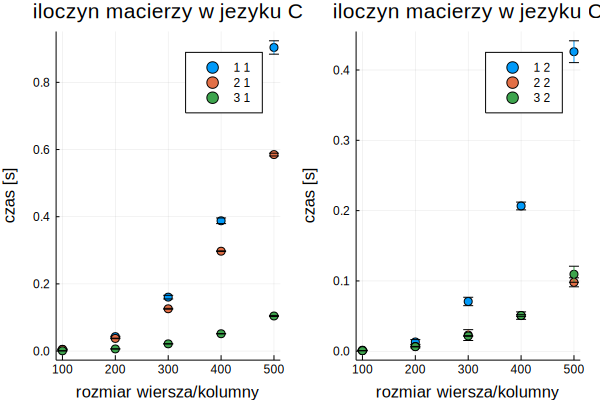

In [140]:
scatter(df[:sizes], df[:mean], group=(df[:option], df[:tryb]),  yerr=df[:std], layout=2,  xlabel = "rozmiar wiersza/kolumny", ylabel = "czas [s]", title = "iloczyn macierzy w jezyku C")

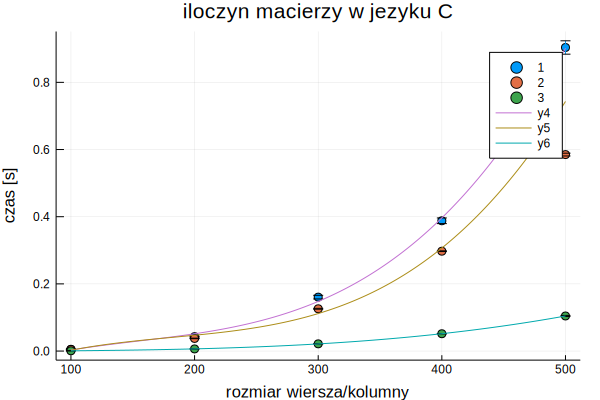

In [169]:
scatter(df[:sizes][1:15], df[:mean][1:15], group=(df[:option][1:15]),  yerr=df[:std][1:15],  xlabel = "rozmiar wiersza/kolumny", ylabel = "czas [s]", title = "iloczyn macierzy w jezyku C")
sizesnaive1 = df[:sizes][1:5]
meansnaive1 = df[:mean][1:5]
sizesbetter1 = df[:sizes][5:10]
meansbetter1 = df[:mean][5:10]
sizesblas1 = df[:sizes][11:15]
meansblas1 = df[:mean][11:15]
fit4 = polyfit(sizesnaive1,meansnaive1 , 3)
fit5 = polyfit(sizesbetter1,meansbetter1 , 3)
fit6 = polyfit(sizesblas1,meansblas1 , 3)
plot!(100:1:500,polyval(fit4,100:1:500))
plot!(100:1:500,polyval(fit5,100:1:500))
plot!(100:1:500,polyval(fit6,100:1:500))

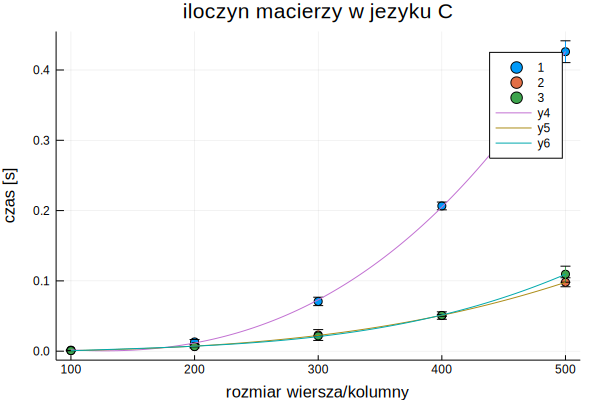

In [170]:
scatter(df[:sizes][16:30], df[:mean][16:30], group=(df[:option][16:30]),  yerr=df[:std][16:30],  xlabel = "rozmiar wiersza/kolumny", ylabel = "czas [s]", title = "iloczyn macierzy w jezyku C")
sizesnaive2 = df[:sizes][16:20]
meansnaive2 = df[:mean][16:20]
sizesbetter2 = df[:sizes][21:25]
meansbetter2 = df[:mean][21:25]
sizesblas2 = df[:sizes][26:30]
meansblas2 = df[:mean][26:30]
fit7 = polyfit(sizesnaive2,meansnaive2 , 3)
fit8 = polyfit(sizesbetter2,meansbetter2 , 3)
fit9 = polyfit(sizesblas2,meansblas2 , 3)
plot!(100:1:500,polyval(fit7,100:1:500))
plot!(100:1:500,polyval(fit8,100:1:500))
plot!(100:1:500,polyval(fit9,100:1:500))

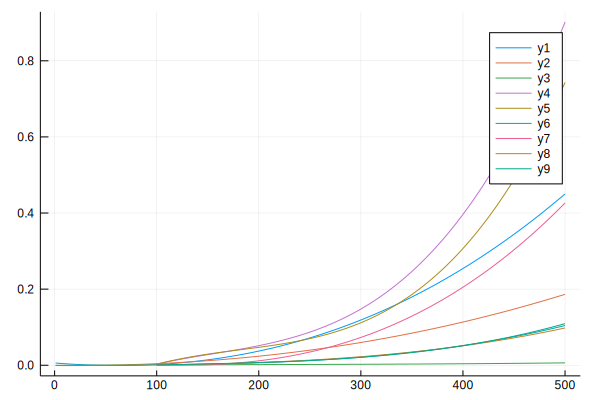

In [181]:
plot(1:1:500,polyval(fit1,1:1:500))
plot!(1:1:500,polyval(fit2,1:1:500))
plot!(1:1:500,polyval(fit3,1:1:500))
plot!(100:1:500,polyval(fit4,100:1:500))
plot!(100:1:500,polyval(fit5,100:1:500))
plot!(100:1:500,polyval(fit6,100:1:500))
plot!(100:1:500,polyval(fit7,100:1:500))
plot!(100:1:500,polyval(fit8,100:1:500))
plot!(100:1:500,polyval(fit9,100:1:500))

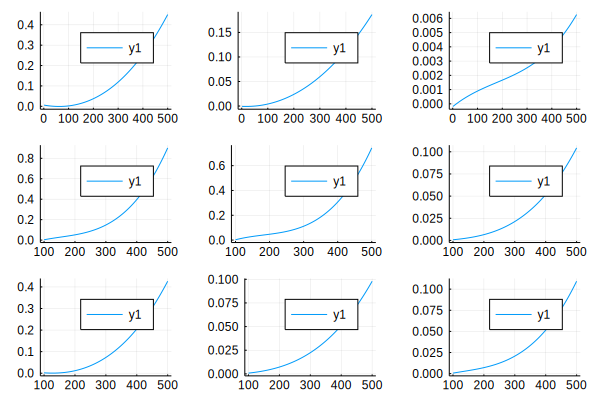

In [180]:
plot(
    plot(1:1:500,polyval(fit1,1:1:500)), #julia_naive#
plot(1:1:500,polyval(fit2,1:1:500)),     #julia_better#
plot(1:1:500,polyval(fit3,1:1:500)),     #julia_blas#
plot(100:1:500,polyval(fit4,100:1:500)), #C_naive#
plot(100:1:500,polyval(fit5,100:1:500)), #C_better#
plot(100:1:500,polyval(fit6,100:1:500)), #C_blas#
plot(100:1:500,polyval(fit7,100:1:500)), #C_naive_opt#
plot(100:1:500,polyval(fit8,100:1:500)), #C_better_opt#
plot(100:1:500,polyval(fit9,100:1:500))  #C_blas_opt#
    )